# 03 Exploding Geometries

It is necessary for some operations to explode or to split the existing geometries such as LineStrings, MultiLineStrings or Polygons in the single parts. 

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')

## Exploding LineStrings

LineStrings can be split into a list of single LineStrings using the ``extract_linestring()`` function of the vector module. It is based on the Shapely `split()` function. 


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


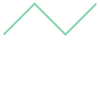

In [2]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import gemgis as gg

linestring = LineString([(0,0), (5,5), (10,0), (15,5)])

linestring

In [3]:
linestring_gdf = gpd.GeoDataFrame(geometry=[linestring])

linestring_gdf

,geometry
0,"LINESTRING (0.00000 0.00000, 5.00000 5.00000, ..."


A list of single LineStrings will be created when exploding the input LineString. This list can easily be converted to a GeoDataFrame. It can be seen that the input LineString was split into three parts and that the end points of each part coincide with the original LineString vertices.


In [4]:
linestring_list = gg.vector.explode_linestring(linestring=linestring)

linestring_list

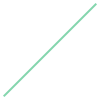

In [5]:
linestring_list[0]

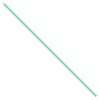

In [6]:
linestring_list[1]

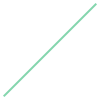

In [7]:
linestring_list[2]

In [8]:
linestring_gdf = gpd.GeoDataFrame(geometry=linestring_list)

linestring_gdf

,geometry
0,"LINESTRING (0.00000 0.00000, 5.00000 5.00000)"
1,"LINESTRING (5.00000 5.00000, 10.00000 0.00000)"
2,"LINESTRING (10.00000 0.00000, 15.00000 5.00000)"


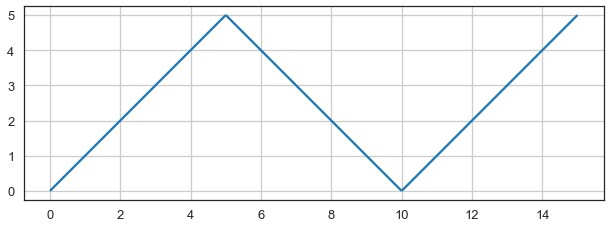

In [9]:
linestring_gdf.plot()
plt.grid()

## Exploding MultiLineStrings

MultiLineStrings can be split into a list of single LineStrings (with multiple vertices) using the ``explode_multilinestring()`` function of the vector module. This can also be achieved by accessing the LineStrings via `list(multilinestring.coords)`. If MultiLineStrings are provided as a GeoDataFrame, the function `explode_multilinestrings` can be used. This functions uses the built-in `gdf.explode()` function of GeoPandas. 


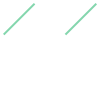

In [10]:
from shapely.geometry import MultiLineString
import matplotlib.pyplot as plt
import geopandas as gpd
import gemgis as gg

linestrings = [((0,0), (5,5)), ((10,0), (15,5))]

multilinestring = MultiLineString(linestrings)
multilinestring

In [11]:
multilinestring_gdf = gpd.GeoDataFrame(geometry=[multilinestring])

multilinestring_gdf

,geometry
0,"MULTILINESTRING ((0.00000 0.00000, 5.00000 5.0..."


A list of single LineStrings (with multiple vertices) will be created when exploding the input MultiLineString. This list can easily be converted to a GeoDataFrame. It can be seen that the input MultiLineString was split into two single LineStrings and that the end points of each part coincide with the original MultiLineString vertices.


In [12]:
multilinestring_list = gg.vector.explode_multilinestring(multilinestring=multilinestring)

multilinestring_list

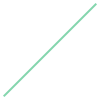

In [13]:
multilinestring_list[0]

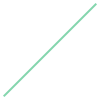

In [14]:
multilinestring_list[1]

In [15]:
gdf = gpd.GeoDataFrame(geometry=multilinestring_list)
gdf

,geometry
0,"LINESTRING (0.00000 0.00000, 5.00000 5.00000)"
1,"LINESTRING (10.00000 0.00000, 15.00000 5.00000)"


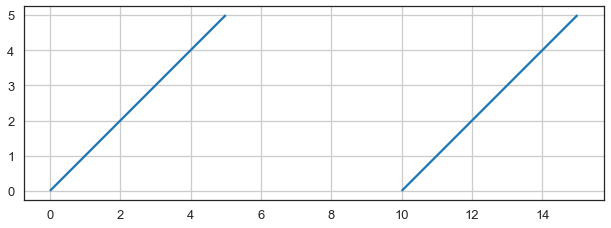

In [16]:
gdf.plot()
plt.grid()

A GeoDataFrame containig multiple MultiLineStrings can be exploded to LineStrings using `explode_multilinestrings`.

In [17]:
splitted_multilinestring_gdf = gg.vector.explode_multilinestrings(pd.concat([multilinestring_gdf, multilinestring_gdf]).reset_index().drop('index', axis=1))
splitted_multilinestring_gdf

,geometry
0,"LINESTRING (0.00000 0.00000, 5.00000 5.00000)"
1,"LINESTRING (10.00000 0.00000, 15.00000 5.00000)"
2,"LINESTRING (0.00000 0.00000, 5.00000 5.00000)"
3,"LINESTRING (10.00000 0.00000, 15.00000 5.00000)"


## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xy](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).

* reset_index (bool)
* drop_level0 (bool)
* drop_level1 (bool)


In [18]:
splitted_multilinestring_gdf = gg.vector.explode_multilinestrings(pd.concat([multilinestring_gdf, multilinestring_gdf]).reset_index().drop('index', axis=1),
                                                                  reset_index=False,
                                                                  drop_level0=False,
                                                                  drop_level1=False)
splitted_multilinestring_gdf

geometry
0 0    LINESTRING (0.00000 0.00000, 5.00000 5.00000)
  1  LINESTRING (10.00000 0.00000, 15.00000 5.00000)
1 0    LINESTRING (0.00000 0.00000, 5.00000 5.00000)
  1  LINESTRING (10.00000 0.00000, 15.00000 5.00000)

In [19]:
splitted_multilinestring_gdf = gg.vector.explode_multilinestrings(pd.concat([multilinestring_gdf, multilinestring_gdf]).reset_index().drop('index', axis=1),
                                                                 reset_index=True,
                                                                 drop_level0=False,
                                                                 drop_level1=False)
splitted_multilinestring_gdf

,level_0,level_1,geometry
0,0,0,"LINESTRING (0.00000 0.00000, 5.00000 5.00000)"
1,0,1,"LINESTRING (10.00000 0.00000, 15.00000 5.00000)"
2,1,0,"LINESTRING (0.00000 0.00000, 5.00000 5.00000)"
3,1,1,"LINESTRING (10.00000 0.00000, 15.00000 5.00000)"


## Exploding Polygons

Polygons can be split into a list of single Points using the ``explode_polygon()`` function of the vector module. If Polygons are provided as a GeoDataFrame, the function `explode_polygons` can be used. This functions uses the built-in `gdf.boundary` attribute of a GeoDataFrame to convert Polygons into LineStrings and MultiLineStrings.

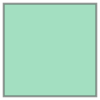

In [20]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import gemgis as gg

polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
polygon

A list of single Points will be created when exploding the input Polygon. This list can easily be converted to a GeoDataFrame. It can be seen that the input Polygon was split into fice single points corresponding to the corner points of the Polygon.


In [21]:
points_list = gg.vector.explode_polygon(polygon=polygon)
points_list

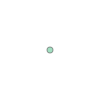

In [22]:
points_list[0]

In [23]:
gdf = gpd.GeoDataFrame(geometry=points_list)
gdf

,geometry
0,POINT (0.00000 0.00000)
1,POINT (10.00000 0.00000)
2,POINT (10.00000 10.00000)
3,POINT (0.00000 10.00000)
4,POINT (0.00000 0.00000)


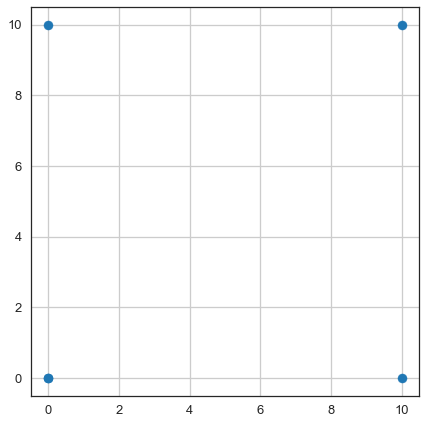

In [24]:
gdf.plot()
plt.grid()

A GeoDataFrame containig multiple polygons can be exploded to LineStrings and MultiLineStrings using `explode_polygons`.

In [25]:
gdf = gpd.GeoDataFrame(geometry=[polygon, polygon])
gdf

,geometry
0,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."
1,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."


In [26]:
boundary_gdf = gg.vector.explode_polygons(gdf=gdf)
boundary_gdf

,geometry
0,"LINESTRING (0.00000 0.00000, 10.00000 0.00000,..."
1,"LINESTRING (0.00000 0.00000, 10.00000 0.00000,..."


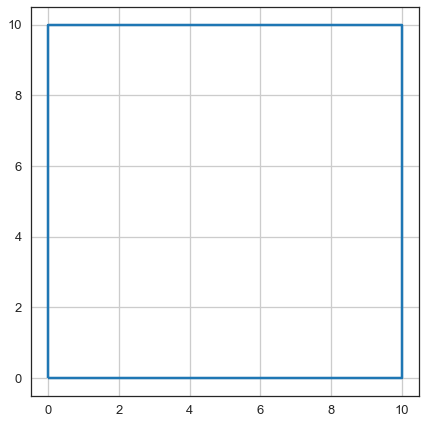

In [27]:
boundary_gdf.plot()
plt.grid()